In [1]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

import numpy as np
np.random.seed(666)

import pandas as pd
class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

In [2]:
## LSST imports:
import lsst.utils.tests as tests
import lsst.daf.base as dafBase
#import lsst.afw.display.ds9 as ds9
import lsst.afw.image as afwImage
import lsst.afw.geom as afwGeom
import lsst.afw.table as afwTable
import lsst.afw.math as afwMath
import lsst.meas.algorithms as measAlg
import lsst.ip.diffim as ipDiffim

In [3]:
import imp, os
print os.getenv('IP_DIFFIM_DIR')+'/tests/testDipoleFitter.py'
dtUtils = imp.load_source('dtUtils', os.getenv('IP_DIFFIM_DIR')+'/tests/testDipoleFitter.py')
from lsst.ip.diffim import dipoleFitTask as dft

/Users/dreiss/GIT_REPOS/ip_diffim/tests/testDipoleFitter.py


 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "b"
 - Adding parameter for hint "x1"
 - Adding parameter for hint "y1"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "b"
 - Adding parameter "x1"
 - Adding parameter "y1"
[[Model]]
    Model(genDipoleModel)
[[Fit Statistics]]
    # function evals   = 111
    # data points      = 630
    # variables        = 8
    chi-square         = 1712.900
    reduced chi-square = 2.754
[[Variables]]
    xcenPos:   25.2491600 +/- 0.033721 (0.13%) (init= 23)
    ycenPos:   25.0648726 +/- 0.033987 (0.14%) (init= 24)
    xcenNeg:   24.8007886 +/- 0.034206 (0.14%) (init= 25.5)
    ycenNeg:   24.9514498 +/- 0.034429 (0.14%) (init= 25.5)
    flux:      489.075614 +/- 5

/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument footprint does notmatch any arguments of the model function.It will be ignored.
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument rel_weight does notmatch any arguments of the model function.It will be ignored.
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument psf does notmatch any arguments of the model function.It will be ignored.


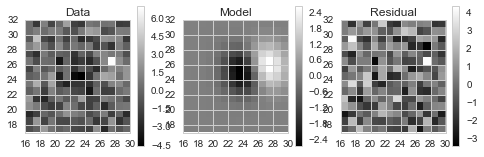

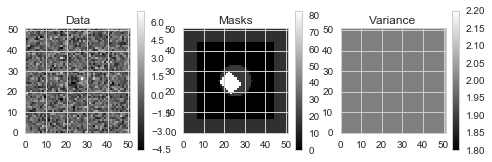

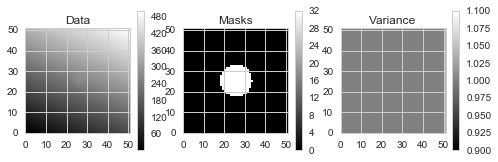

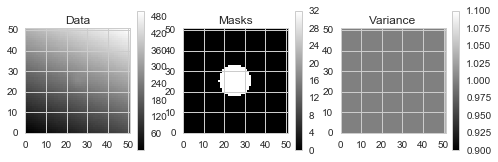

In [4]:
diffim, (posImage, posCatalog), (negImage, negCatalog) = \
    dtUtils.DipoleTestUtils.makeDipoleImage(w=51, h=51, flux=[500.], xcenPos=[25.2], ycenPos=[25.], 
                                            xcenNeg=[24.8], ycenNeg=[25.], noise=1.,
                                            gradientParams=(1., 3., 7.))
s = dtUtils.DipoleTestUtils.detectDipoleSources(diffim, posImage, posCatalog, negImage, negCatalog, doMerge=True)

result = dft.DipoleFitAlgorithm.fitDipole_new(diffim, s[0], posImage, negImage, verbose=True, 
                                              rel_weight=0.5, tol=1e-3, separateNegParams=False, display=True)

dft.DipolePlotUtils.displayExposure(diffim)
dft.DipolePlotUtils.displayExposure(posImage)
dft.DipolePlotUtils.displayExposure(negImage)

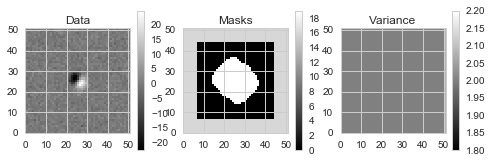

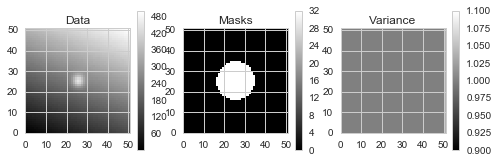

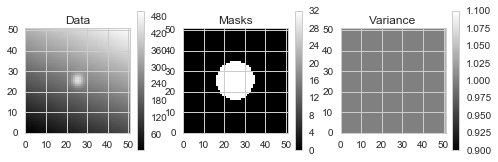

In [5]:
xc=25.; yc=25.; separation=0.4; rotAngle=324.

rotAngRad = rotAngle / 180. * np.pi
sep = separation / 2.
xcenPos, ycenPos = xc+sep*np.cos(rotAngRad), yc+sep*np.sin(rotAngRad)
xcenNeg, ycenNeg = xc-sep*np.cos(rotAngRad), yc-sep*np.sin(rotAngRad)

diffim, (posImage, posCatalog), (negImage, negCatalog) = \
    dtUtils.DipoleTestUtils.makeDipoleImage(w=51, h=51, xcenPos=[xcenPos], ycenPos=[ycenPos], \
                         xcenNeg=[xcenNeg], ycenNeg=[ycenNeg], \
                         psfSigma=2., flux=[5000.], noise=1., \
                        gradientParams=(1., 3., 7.))
    
dft.DipolePlotUtils.displayExposure(diffim)
dft.DipolePlotUtils.displayExposure(posImage)
dft.DipolePlotUtils.displayExposure(negImage)

s = dtUtils.DipoleTestUtils.detectDipoleSources(diffim, posImage, posCatalog, negImage, negCatalog, doMerge=True)

#_, result2 = dft.DipoleFitAlgorithm.fitDipole_new(diffim, s[0], posImage, negImage, tol=1e-4, rel_weight=0.5, 
#                                                  separateNegParams=False, include2ndOrderGradient=False, 
#                                                  verbose=True, display=True, return_fitObj=True)
_, result2 = dft.DipoleFitAlgorithm.fitDipole_new(diffim, s[0], posImage, negImage, tol=1e-7, rel_weight=0.05, 
                                                  separateNegParams=False, bgGradientOrder=0, verbose=False, 
                                                  display=False, return_fitObj=True)

            95.00%    68.00%    _BEST_    68.00%    95.00%
 xcenPos:  -0.39253  -0.19664  25.42208  +0.19482  +0.38151
 ycenPos:  -0.40599  -0.20164  25.47944  +0.19708  +0.38108
 xcenNeg:  -0.37838  -0.19730  25.07177  +0.20304  +0.39914
 ycenNeg:  -0.36639  -0.18281  25.70310  +0.18488  +0.36751
 flux   :-491.72489-249.361765121.31819+249.43100+491.84157
 b      :  -2.57050  -1.30189 250.82745  +1.30143  +2.57015


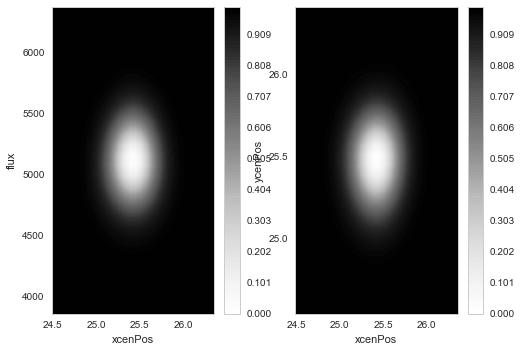

In [6]:
import lmfit
ci, trace = lmfit.conf_interval(result2, result2, sigmas=[0.68,0.95], trace=True, verbose=False)
lmfit.printfuncs.report_ci(ci)

cx, cy, grid = lmfit.conf_interval2d(result2, result2, 'xcenPos','flux', 30, 30)
plt.subplot(1, 2, 1)
plt.contourf(cx, cy, grid, np.linspace(0,1,100))
plt.xlabel('xcenPos')
plt.ylabel('flux')
plt.colorbar()

plt.subplot(1, 2, 2)
cx, cy, grid = lmfit.conf_interval2d(result2, result2, 'xcenPos','ycenPos', 30, 30)
plt.contourf(cx, cy, grid, np.linspace(0,1,100))
plt.xlabel('xcenPos')
plt.ylabel('ycenPos')
plt.colorbar()

In [7]:
## NOT RUN:
if False:
    import cPickle as pickle
    import gzip
    results, results2, results3 = pickle.load(gzip.GzipFile("results_8j.p.gz", "rb"))

NameError: name 'results3' is not defined

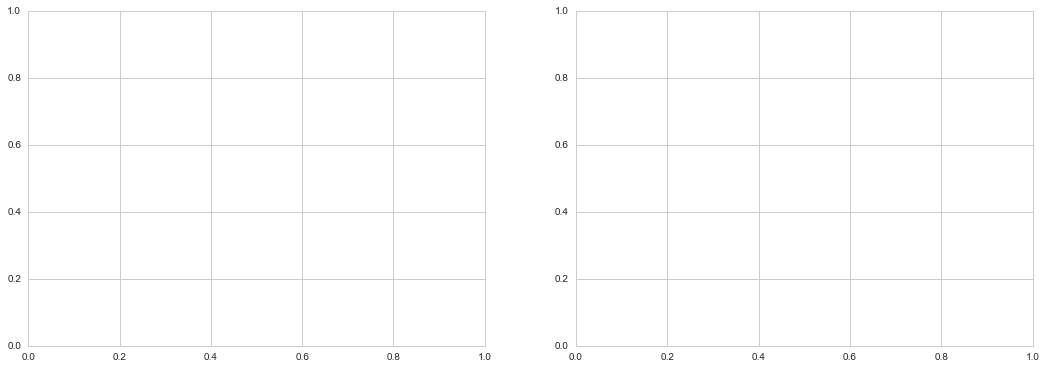

In [8]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df1 = pd.DataFrame([res['new'] for res in results3])
df2 = df1.copy()
df1['rmsCentroid'] = np.sqrt((df1.inputPosCentroidX - df1.psfFitPosCentroidX)**2. + \
                               (df1.inputPosCentroidY - df1.psfFitPosCentroidY)**2.)   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['rmsCentroid'] = np.sqrt((df2.inputNegCentroidX - df2.psfFitNegCentroidX)**2. + \
                               (df2.inputNegCentroidY - df2.psfFitNegCentroidY)**2.)   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
sns.violinplot(x="inputSeparation", y="rmsCentroid", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.1, bw=0.1, ax=axes[0])
sns.despine(left=True)

# df1 = pd.DataFrame([res['old'] for res in results3])
# df2 = df1.copy()
# df1['rmsCentroid'] = np.sqrt((df1.inputPosCentroidX - df1.psfFitPosCentroidX)**2. + \
#                                (df1.inputPosCentroidY - df1.psfFitPosCentroidY)**2.)   # positive
# df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
# df2['rmsCentroid'] = np.sqrt((df2.inputNegCentroidX - df2.psfFitNegCentroidX)**2. + \
#                                (df2.inputNegCentroidY - df2.psfFitNegCentroidY)**2.)   # negative
# df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
# sns.violinplot(x="inputSeparation", y="rmsCentroid", hue="posOrNeg", data=df1.append(df2), split=True,
#                inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.1, bw=0.1, ax=axes[1])
# sns.despine(left=True)

axes[0].set_title('New')
axes[0].set_ylim([-0.05,0.8])
# axes[1].set_title('Old')
# axes[1].set_ylim([-0.05,0.8])

In [ ]:
sizeme(df2.ix[(df2.inputSeparation==0.4)]) # & (df2.inputFlux==750.)])